# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Read Dataset

In [2]:
A = pd.read_csv('HR-Employee-Attrition-Table 1.csv')

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Preprocessing

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
A.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
A.shape

(1470, 35)

In [7]:
# Missing Data Treatment

A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
A.nunique().sort_values()

StandardHours                  1
Over18                         1
EmployeeCount                  1
Attrition                      2
PerformanceRating              2
OverTime                       2
Gender                         2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
WorkLifeBalance                4
EnvironmentSatisfaction        4
StockOptionLevel               4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [9]:
# Drop descreate columns

B = A.drop(labels=['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)


In [10]:
# separate cat,con

cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [11]:
B[con].nunique().sort_values()

Attrition                      2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
dtype: int64

In [12]:
cat.append('Attrition')
cat.append('PerformanceRating')
cat.append('WorkLifeBalance')
cat.append('StockOptionLevel')
cat.append('EnvironmentSatisfaction')
cat.append('RelationshipSatisfaction')
cat.append('JobInvolvement')
cat.append('JobSatisfaction')
cat.append('Education')
cat.append('JobLevel')
cat.append('TrainingTimesLastYear')
cat.append('NumCompaniesWorked')
cat.append('PercentSalaryHike')
cat.append('YearsSinceLastPromotion')
cat.append('YearsWithCurrManager')
cat.append('YearsInCurrentRole')
cat.append('DistanceFromHome')
cat.append('YearsAtCompany')
cat.append('TotalWorkingYears')
cat.append('HourlyRate')

In [13]:
con.remove('Attrition')
con.remove('PerformanceRating')
con.remove('WorkLifeBalance')
con.remove('StockOptionLevel')
con.remove('EnvironmentSatisfaction')
con.remove('RelationshipSatisfaction')
con.remove('JobInvolvement')
con.remove('JobSatisfaction')
con.remove('Education')
con.remove('JobLevel')
con.remove('TrainingTimesLastYear')
con.remove('NumCompaniesWorked')
con.remove('PercentSalaryHike')
con.remove('YearsSinceLastPromotion')
con.remove('YearsWithCurrManager')
con.remove('YearsInCurrentRole')
con.remove('DistanceFromHome')
con.remove('YearsAtCompany')
con.remove('TotalWorkingYears')
con.remove('HourlyRate')

In [14]:
# checking outliers

A[con]

,Age,DailyRate,MonthlyIncome,MonthlyRate
0,41,1102,5993,19479
1,49,279,5130,24907
2,37,1373,2090,2396
3,33,1392,2909,23159
4,27,591,3468,16632
...,...,...,...,...
1465,36,884,2571,12290
1466,39,613,9991,21457
1467,27,155,6142,5174
1468,49,1023,5390,13243


In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X1

,Age,DailyRate,MonthlyIncome,MonthlyRate
0,0.446350,0.742527,-0.108350,0.726020
1,1.322365,-1.297775,-0.291719,1.488876
2,0.008343,1.414363,-0.937654,-1.674841
3,-0.429664,1.461466,-0.763634,1.243211
4,-1.086676,-0.524295,-0.644858,0.325900
...,...,...,...,...
1465,-0.101159,0.202082,-0.835451,-0.284329
1466,0.227347,-0.469754,0.741140,1.004010
1467,-1.086676,-1.605183,-0.076690,-1.284418
1468,1.322365,0.546677,-0.236474,-0.150393


In [16]:
out = X1[(X1.MonthlyIncome>3) | (X1.MonthlyIncome<-3)].index

In [17]:
out = []
for i in con:
    out = X1[(X1[i]>3) | (X1[i]<-3)].index

In [18]:
# out

In [19]:
from numpy import unique
outlier = list(unique(out))

In [20]:
# outlier

In [21]:
B = B.drop(index=outlier,axis=0)

In [22]:
B.shape

(1470, 32)

In [23]:
B.index =range(0,1470,1)

In [24]:
B.shape

(1470, 32)

In [25]:
B[con]

,Age,DailyRate,MonthlyIncome,MonthlyRate
0,41,1102,5993,19479
1,49,279,5130,24907
2,37,1373,2090,2396
3,33,1392,2909,23159
4,27,591,3468,16632
...,...,...,...,...
1465,36,884,2571,12290
1466,39,613,9991,21457
1467,27,155,6142,5174
1468,49,1023,5390,13243


# EDA

<AxesSubplot:xlabel='Age', ylabel='DailyRate'>

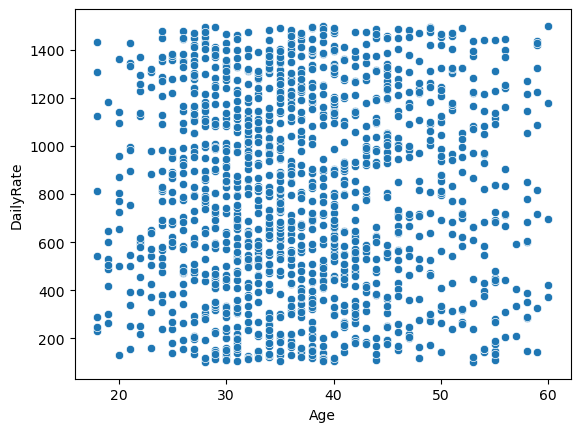

In [26]:
sns.scatterplot(B['Age'],B['DailyRate'])


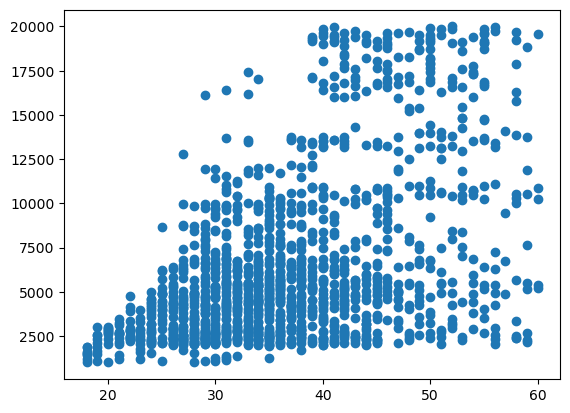

In [27]:
plt.scatter(x='Age',y='MonthlyIncome',data=B)

<AxesSubplot:xlabel='Age', ylabel='MonthlyRate'>

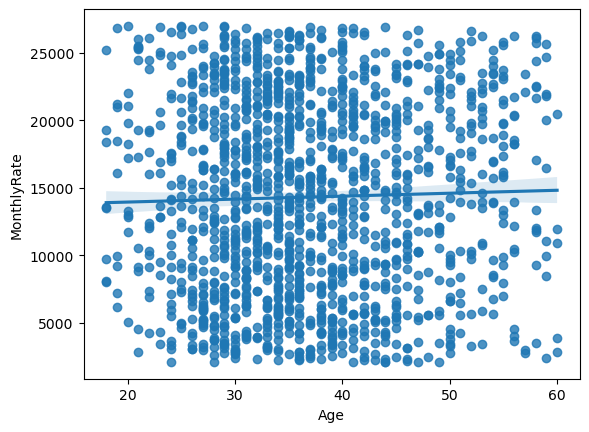

In [28]:
sns.regplot(x='Age',y='MonthlyRate',data=B)

In [29]:
B[cat]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition,PerformanceRating,...,TrainingTimesLastYear,NumCompaniesWorked,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRole,DistanceFromHome,YearsAtCompany,TotalWorkingYears,HourlyRate
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,1,3,...,0,8,11,0,5,4,1,6,8,94
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,0,4,...,3,1,23,1,7,7,8,10,10,61
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,1,3,...,3,6,15,0,0,0,2,0,7,92
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,0,3,...,3,1,11,3,0,7,3,8,8,56
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,0,3,...,3,9,12,2,2,2,2,2,6,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,0,3,...,3,4,17,0,3,2,23,5,17,41
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,0,3,...,5,4,15,1,7,7,6,7,9,42
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,0,4,...,0,1,20,0,3,2,4,6,6,87
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,0,3,...,3,2,14,0,8,6,2,9,17,63


<AxesSubplot:xlabel='BusinessTravel', ylabel='Age'>

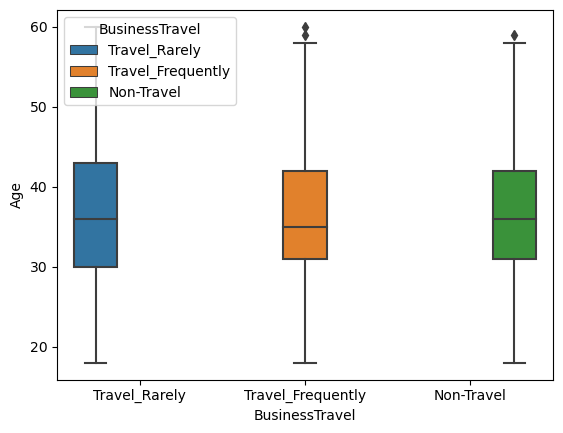

In [30]:
sns.boxplot(x='BusinessTravel',y='Age',data=B,hue='BusinessTravel')

<AxesSubplot:xlabel='Department', ylabel='Age'>

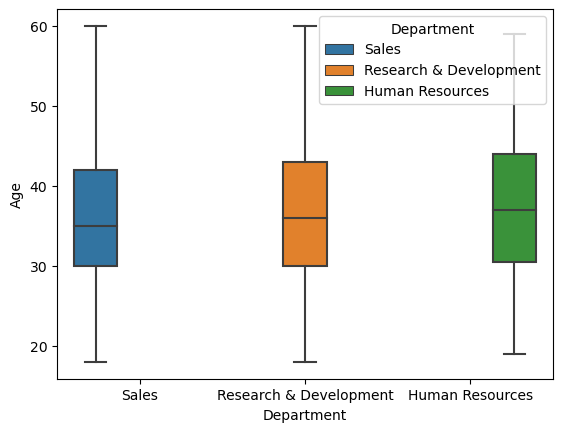

In [31]:
sns.boxplot(x='Department',y='Age',data=B,hue='Department')

<AxesSubplot:xlabel='EducationField', ylabel='Age'>

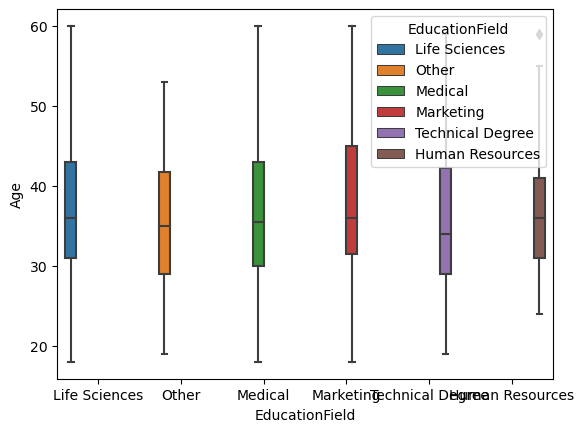

In [32]:
sns.boxplot(x='EducationField',y='Age',data=B,hue='EducationField')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

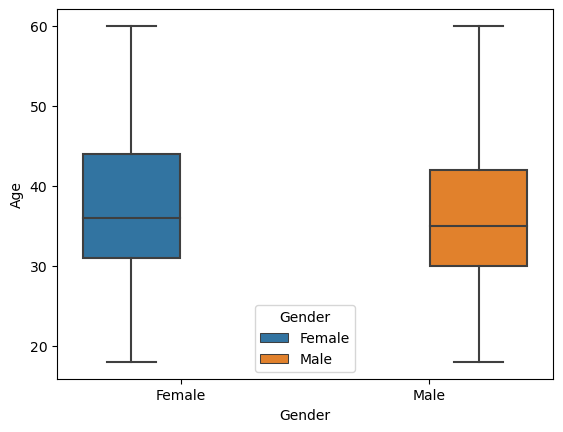

In [33]:
sns.boxplot(x='Gender',y='Age',data=B,hue='Gender')

In [34]:
B[cat].columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition', 'PerformanceRating',
       'WorkLifeBalance', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'Education', 'JobLevel', 'TrainingTimesLastYear', 'NumCompaniesWorked',
       'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany',
       'TotalWorkingYears', 'HourlyRate'],
      dtype='object')

<AxesSubplot:xlabel='JobRole', ylabel='Age'>

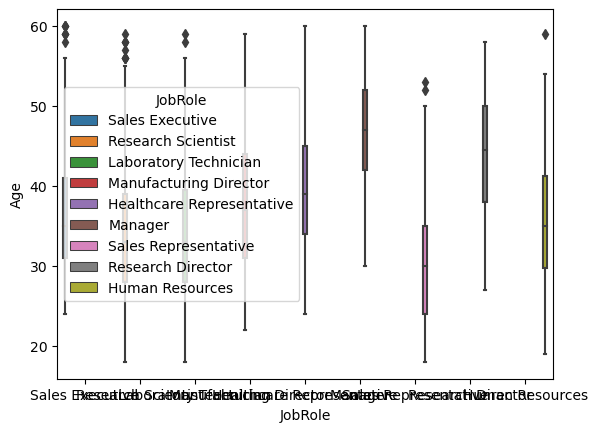

In [35]:
sns.boxplot(x='JobRole',y='Age',data=B,hue='JobRole')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

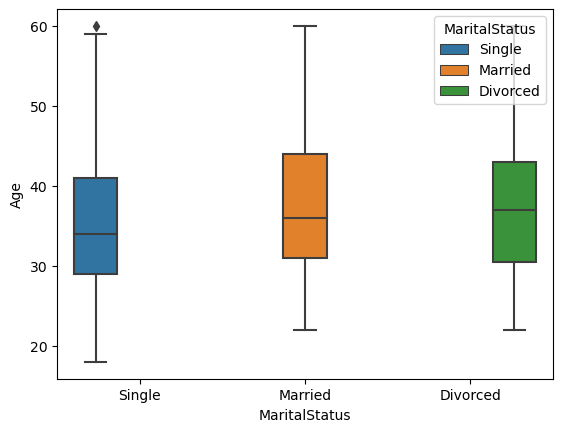

In [36]:
sns.boxplot(x='MaritalStatus',y='Age',data=B,hue='MaritalStatus')

<AxesSubplot:xlabel='OverTime', ylabel='Age'>

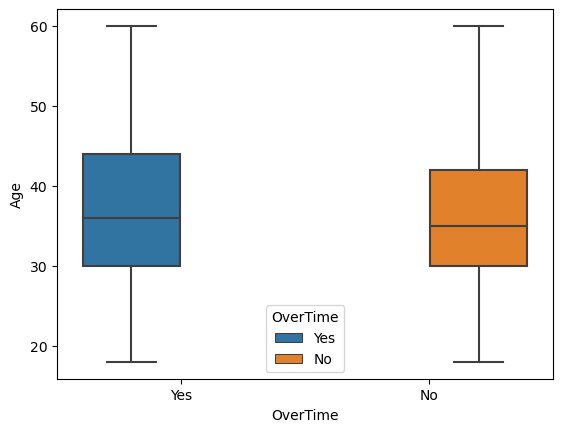

In [37]:
sns.boxplot(x='OverTime',y='Age',data=B,hue='OverTime')

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

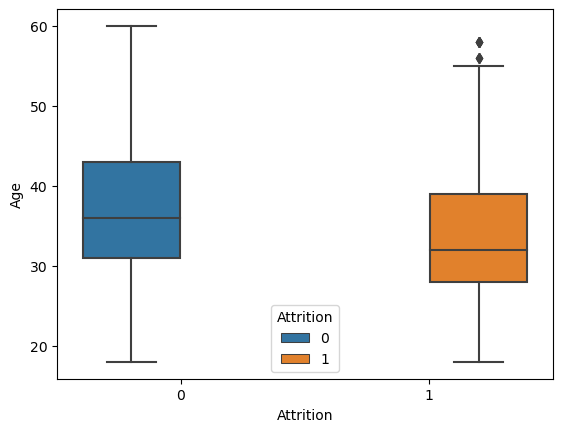

In [38]:
sns.boxplot(x='Attrition',y='Age',data=B,hue='Attrition')

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

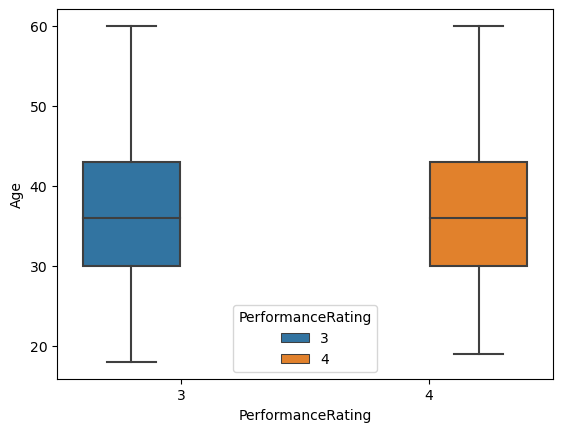

In [39]:
sns.boxplot(x='PerformanceRating',y='Age',hue='PerformanceRating',data=B)
# B['PerformanceRating'].unique()

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Age'>

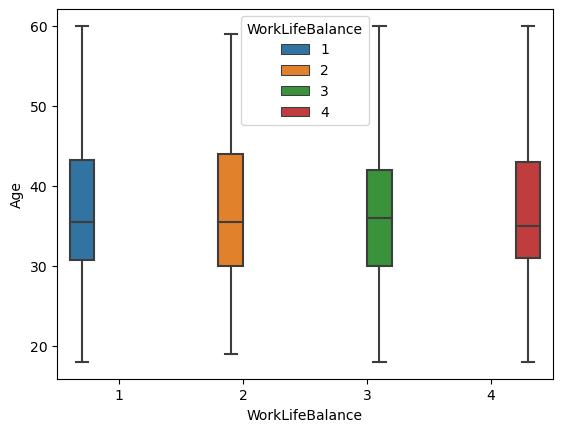

In [40]:
sns.boxplot(x='WorkLifeBalance',y='Age',hue='WorkLifeBalance',data=B)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Age'>

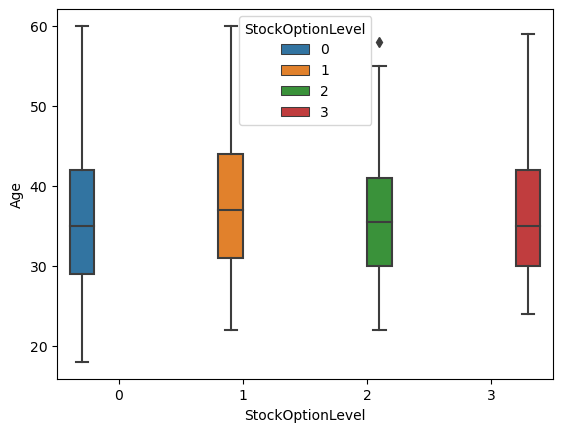

In [41]:
sns.boxplot(x='StockOptionLevel',y='Age',hue='StockOptionLevel',data=B)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Age'>

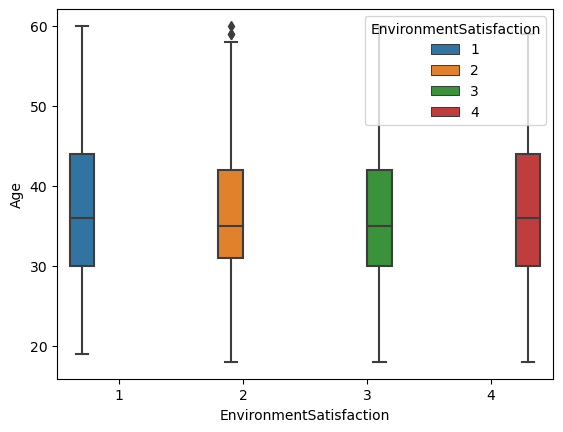

In [42]:
sns.boxplot(x='EnvironmentSatisfaction',y='Age',hue='EnvironmentSatisfaction',data=B)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Age'>

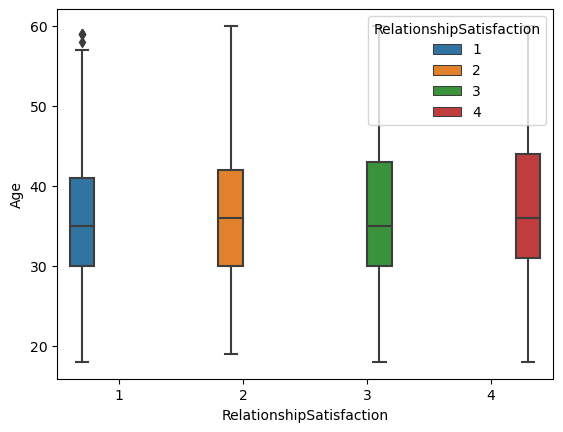

In [43]:
sns.boxplot(x='RelationshipSatisfaction',y='Age',hue='RelationshipSatisfaction',data=B)

<AxesSubplot:xlabel='Education', ylabel='Age'>

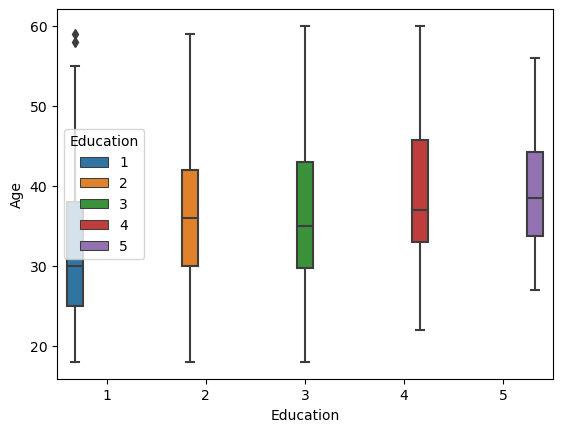

In [44]:
sns.boxplot(x='Education',y='Age',hue='Education',data=B)

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

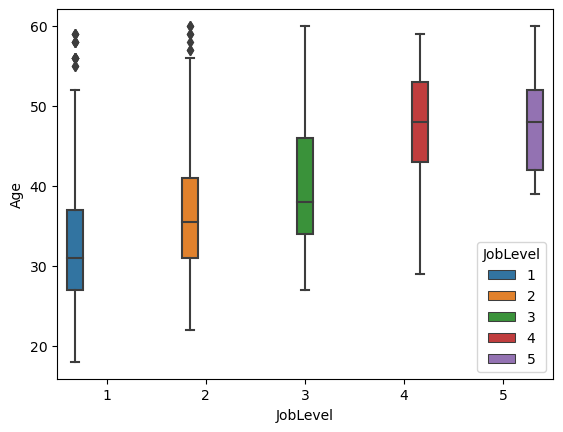

In [45]:
sns.boxplot(x='JobLevel',y='Age',hue='JobLevel',data=B)

In [46]:
B[cat].columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition', 'PerformanceRating',
       'WorkLifeBalance', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'Education', 'JobLevel', 'TrainingTimesLastYear', 'NumCompaniesWorked',
       'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany',
       'TotalWorkingYears', 'HourlyRate'],
      dtype='object')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Age'>

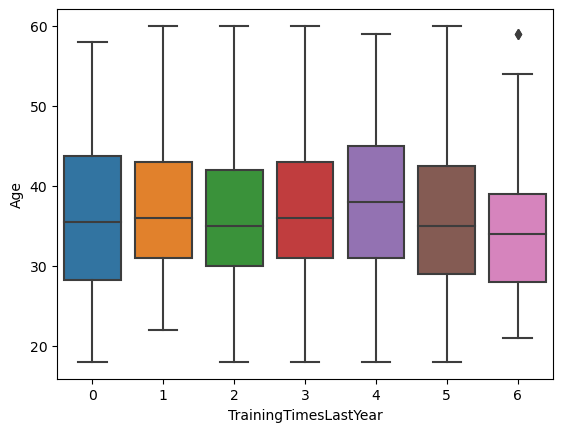

In [47]:


sns.boxplot(x='TrainingTimesLastYear',y='Age',data=B)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Age'>

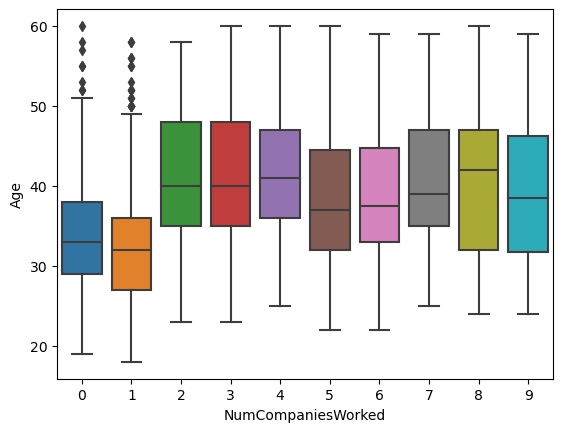

In [48]:
sns.boxplot(x='NumCompaniesWorked',y='Age',data=B)

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Age'>

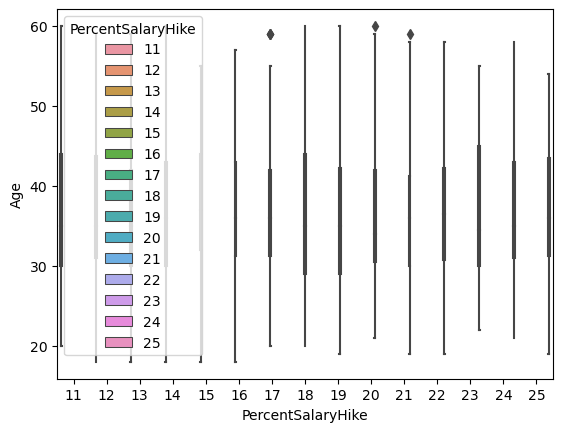

In [49]:
sns.boxplot(x='PercentSalaryHike',y='Age',data=B,hue='PercentSalaryHike')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Age'>

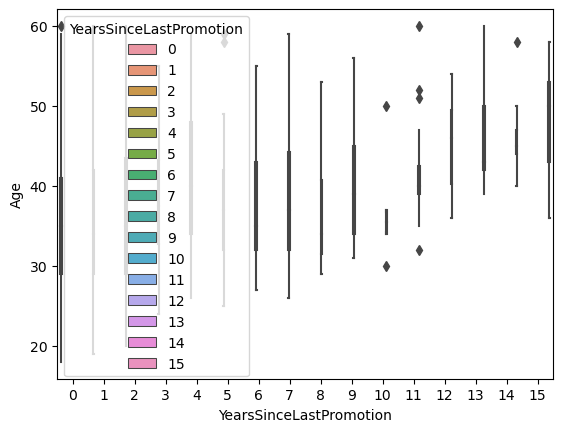

In [50]:
sns.boxplot(x='YearsSinceLastPromotion',y='Age',data=B,hue='YearsSinceLastPromotion')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Age'>

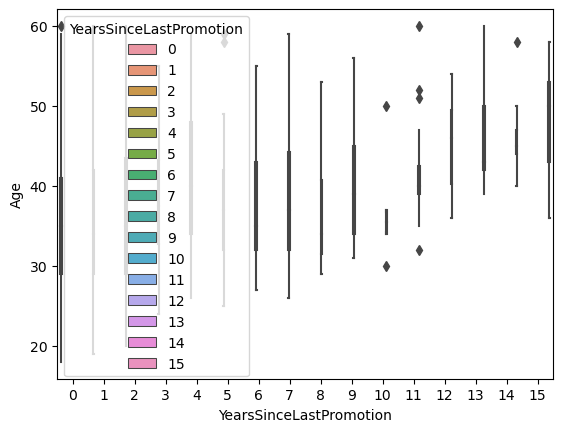

In [51]:
sns.boxplot(x='YearsSinceLastPromotion',y='Age',data=B,hue='YearsSinceLastPromotion')

In [52]:
B[cat].columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition', 'PerformanceRating',
       'WorkLifeBalance', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'Education', 'JobLevel', 'TrainingTimesLastYear', 'NumCompaniesWorked',
       'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany',
       'TotalWorkingYears', 'HourlyRate'],
      dtype='object')

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Age'>

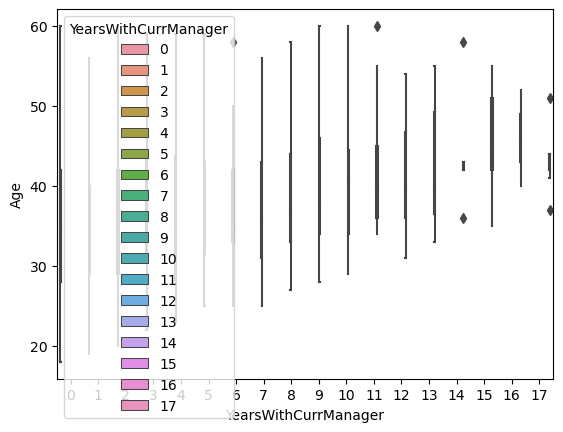

In [53]:
sns.boxplot(x='YearsWithCurrManager',y='Age',data=B,hue='YearsWithCurrManager')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Age'>

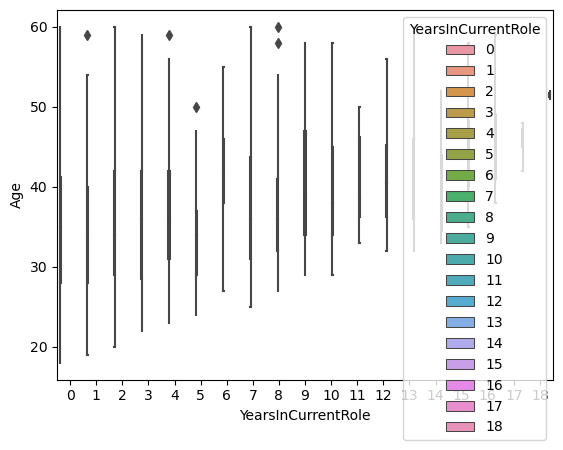

In [54]:
sns.boxplot(x='YearsInCurrentRole',y='Age',data=B,hue='YearsInCurrentRole')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Age'>

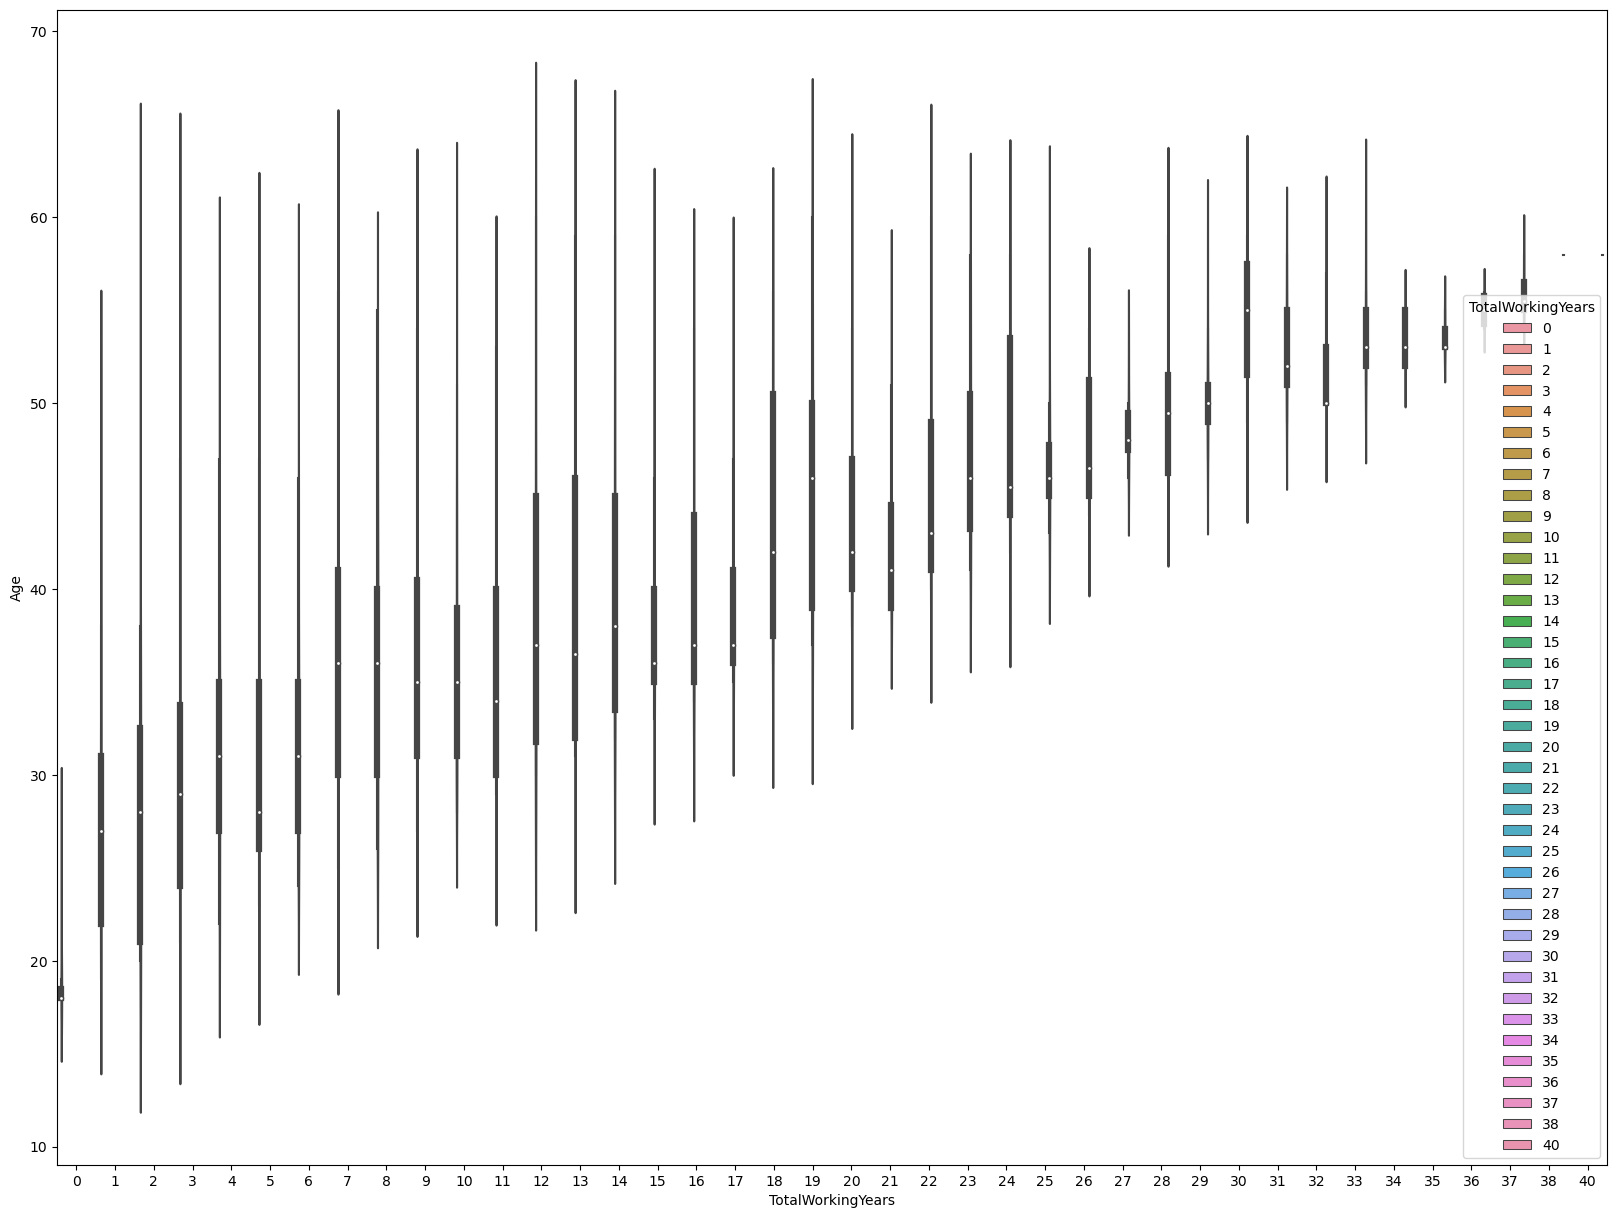

In [55]:
plt.figure(figsize=(20,15))
sns.violinplot(x='TotalWorkingYears',y='Age',data=B,hue='TotalWorkingYears')

In [56]:
#plt.figure(figsize=(20,15))
#sns.countplot(B['HourlyRate'],data=B,hue='HourlyRate')

In [57]:
B.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Define X and Y

In [58]:
Y = B[['MonthlyRate']]
X = B.drop(labels=['MonthlyRate'],axis=1)

In [59]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)
        

In [60]:
X[con].nunique().sort_values()

Attrition                      2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
dtype: int64

In [61]:
cat.append('Attrition')
cat.append('PerformanceRating')
cat.append('WorkLifeBalance')
cat.append('StockOptionLevel')
cat.append('EnvironmentSatisfaction')
cat.append('RelationshipSatisfaction')
cat.append('JobInvolvement')
cat.append('JobSatisfaction')
cat.append('JobLevel')
cat.append('TrainingTimesLastYear')
cat.append('NumCompaniesWorked')
cat.append('PercentSalaryHike')
cat.append('YearsSinceLastPromotion')
cat.append('YearsWithCurrManager')
cat.append('YearsInCurrentRole')
cat.append('DistanceFromHome')
cat.append('YearsAtCompany')
cat.append('TotalWorkingYears')

In [62]:
con.remove('Attrition')
con.remove('PerformanceRating')
con.remove('WorkLifeBalance')
con.remove('StockOptionLevel')
con.remove('EnvironmentSatisfaction')
con.remove('RelationshipSatisfaction')
con.remove('JobInvolvement')
con.remove('JobSatisfaction')
con.remove('JobLevel')
con.remove('TrainingTimesLastYear')
con.remove('NumCompaniesWorked')
con.remove('PercentSalaryHike')
con.remove('YearsSinceLastPromotion')
con.remove('YearsWithCurrManager')
con.remove('YearsInCurrentRole')
con.remove('DistanceFromHome')
con.remove('YearsAtCompany')
con.remove('TotalWorkingYears')

# Normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
mm = MinMaxScaler()
ohe = OneHotEncoder()

X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
# Xnew

# Train_test_split

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [65]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1176, 52), (294, 52), (1176, 1), (294, 1))

# Backward Elimination

In [66]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8961
Date:                Thu, 09 Mar 2023   Prob (F-statistic):              0.666
Time:                        21:38:05   Log-Likelihood:                -12076.
No. Observations:                1176   AIC:                         2.424e+04
Df Residuals:                    1131   BIC:                         2.447e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              3332.8048    716.390      4.652      0.000    1927.201    4738.408
Age                                1466.8356   1400.753      1.047      0.295   -1281.531    4215.203
DailyRate                          -658.1363    731.259     -0.900      0.368   -2092.913     776.641
Education                         -1008.8842    835.700     -1.207      0.228   -2648.582     630.813
HourlyRate                          -54.8507    727.494     -0.075      0.940   -1482.240    1372.539
MonthlyIncome                     -3960.3316   3540.663     -1.119      0.264   -1.09e+04    2986.676
Attrition                           157.8823    654.466      0.241      0.809   -1126.222    1441.986
PerformanceRating                  -178.7047    936.526     -0.191      0.849   -2016.228    1658.819
WorkLifeBalance                     224.8498    298.764      0.753      0.452    -361.343     811.043
StockOptionLevel                   -214.3583    333.487     -0.643      0.520    -868.681     439.965
EnvironmentSatisfaction             448.5980    195.394      2.296      0.022      65.222     831.974
RelationshipSatisfaction             24.6301    195.632      0.126      0.900    -359.213     408.473
JobInvolvement                     -312.0128    299.254     -1.043      0.297    -899.169     275.143
JobSatisfaction                     -27.8153    191.564     -0.145      0.885    -403.676     348.046
JobLevel                            382.7759    696.847      0.549      0.583    -984.482    1750.034
TrainingTimesLastYear                22.1934    166.995      0.133      0.894    -305.462     349.848
NumCompaniesWorked                   25.4037     94.407      0.269      0.788    -159.829     210.637
PercentSalaryHike                    -6.1475     90.086     -0.068      0.946    -182.902     170.606
YearsSinceLastPromotion              46.9991     87.198      0.539      0.590    -124.089     218.087
YearsWithCurrManager                -88.4065     96.412     -0.917      0.359    -277.573     100.759
YearsInCurrentRole                  -12.4176     94.740     -0.131      0.896    -198.304     173.469
DistanceFromHome                     40.5463     26.057      1.556      0.120     -10.579      91.671
YearsAtCompany                      -56.3698     74.431     -0.757      0.449    -202.409      89.669
TotalWorkingYears                     4.5144     61.492      0.073      0.941    -116.137     125.166
BusinessTravel_Non-Travel           811.7240    534.733      1.518      0.129    -237.455    1860.904
BusinessTravel_Travel_Frequently   1270.5295    477.149      2.663      0.008     334.333    2206.726
BusinessTravel_Travel_Rarely       1250.5513    383.272      3.263      0.001     498.547    2002.556
Department_Human Resour

In [67]:
ols.rsquared_adj

-0.003905430148602118

In [68]:
Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]
col_to_drop,ols.rsquared_adj

('EducationField_Technical Degree', -0.003905430148602118)

In [69]:
# Model 2 

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Human Resources -0.003905430148602118


In [70]:
# Model 3

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Manufacturing Director -0.00390543014860234


In [71]:
# Model4

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

PercentSalaryHike -0.003018671753017399


In [72]:
# Model 5

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

HourlyRate -0.002137506769519293


In [73]:
# Model 6

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

TotalWorkingYears -0.0012586564620780116


In [74]:
# Model 7

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

RelationshipSatisfaction -0.0003815201130219492


In [75]:
# Model 8

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

TrainingTimesLastYear 0.0004846221461155542


In [76]:
# Model 9

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

YearsInCurrentRole 0.0013475817212601493


In [77]:
# Model 10

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobSatisfaction 0.0022087629132762077


In [78]:
# Model 11

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

EducationField_Medical 0.0030658483512909784


In [79]:
# Model 12

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Sales Representative 0.003905237338168277


In [80]:
# Model 13

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

Attrition 0.004735746699396137


In [81]:
# Model 14

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

EducationField_Marketing 0.00555100722505486


In [82]:
# Model 15

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

NumCompaniesWorked 0.00634806572649349


In [83]:
# Model 16

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

PerformanceRating 0.007132720280476623


In [84]:
# Model 17

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

EducationField_Life Sciences 0.007854178126084466


In [85]:
# Model 18

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Healthcare Representative 0.008528594613911422


In [86]:
# Model 19

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Laboratory Technician 0.00918641402839171


In [87]:
# Model 20

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

YearsSinceLastPromotion 0.009860490443164616


In [88]:
# Model 21

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

StockOptionLevel 0.010430157540057272


In [89]:
# Model 22

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobLevel 0.010899743506620374


In [90]:
# Model 23

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

Department_Human Resources 0.011358938156319054


In [91]:
# Model 24

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

WorkLifeBalance 0.011358938156319054


In [92]:
# Model 25

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

YearsAtCompany 0.011722151232726019


In [93]:
# Model 26

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

DailyRate 0.01196161680418395


In [94]:
# Model 27

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Research Scientist 0.012005495627478324


In [95]:
# Model 28

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

MonthlyIncome 0.011983268293025873


In [96]:
# Model 29

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Sales Executive 0.012039568683926971


In [97]:
# Model 30

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Manager 0.01238793788906789


In [98]:
# Model 31

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobInvolvement 0.012707722832815183


In [99]:
# Model 32

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

JobRole_Research Director 0.012740505843447547


In [100]:
# Model 33

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

Education 0.012688284756772528


In [101]:
# Model 34

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

BusinessTravel_Non-Travel 0.01217207003380949


In [102]:
# Model 35

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

BusinessTravel_Travel_Frequently 0.012172070033809268


In [103]:
# Model 36

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

BusinessTravel_Travel_Rarely 0.012827304491069613


In [104]:
# Model 37

from sklearn.model_selection import train_test_split
Xnew = Xnew.drop(col_to_drop,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()

Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]

print(col_to_drop,ols.rsquared_adj)

DistanceFromHome 0.013601139421441477


# Model Creation

In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
tr_err,ts_err

(49164740.27, 54519697.75)

In [106]:
# Ridge

from sklearn.linear_model import Ridge
rr = Ridge()
model = rr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
tr_err,ts_err


(49166991.38, 54451156.52)

In [107]:
# Lasso

from sklearn.linear_model import Lasso
ls = Lasso()
model = ls.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
tr_err,ts_err

(49165183.49, 54482390.6)

# reduce the overfiting

In [108]:
x = 1
q = []
for i in range(0,20000,1):
    q.append(x)
    x = x + 1

In [109]:
tr = []
ts = []
GE = []
for i in q:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)
    tr.append(tr_err)
    ts.append(ts_err)
    GE.append(tr_err-ts_err)

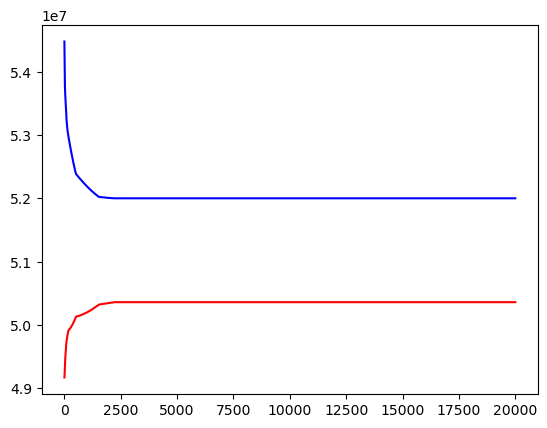

In [110]:
plt.plot(tr,c='r')
plt.plot(ts,c='b')

In [111]:
q[-1]

20000

In [112]:
for i in q[2400:2500]:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)
    print(tr_err,ts_err)

50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 52000748.87
50356940.85 5200

In [113]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=i)
model = ls.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
print(tr_err,ts_err)

50356940.85 52000748.87


In [115]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=2400)
model = ls.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
print(tr_err,ts_err,tr_err-ts_err)

50356940.85 52000748.87 -1643808.0199999958


# Cross Validation

In [117]:
from sklearn.model_selection import GridSearchCV
tg = {'alpha':q[2400:2500]}
rr = Ridge()
cv = GridSearchCV(rr,tg,scoring='neg_mean_squared_error',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 2500}

In [118]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=2500)
model = ls.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,pred_tr),2)
ts_err = round(mean_squared_error(ytest,pred_ts),2)
print(tr_err,ts_err,tr_err-ts_err)

50356940.85 52000748.87 -1643808.0199999958


In [124]:
# using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err

(131329.64923469388, 104353558.13945578)

In [127]:
# pruning

tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    model = dtr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)

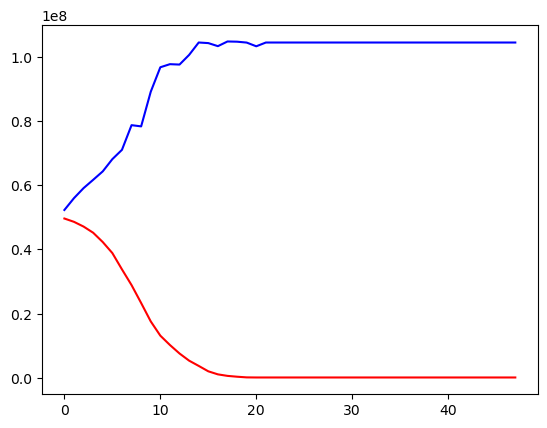

In [128]:
import matplotlib.pyplot as plt
plt.plot(tr,c='r')
plt.plot(ts,c='b')

In [129]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=1)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err

(49991107.75045138, 51951282.90562614)

In [132]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err

(49592797.21675777, 52246776.4892721)

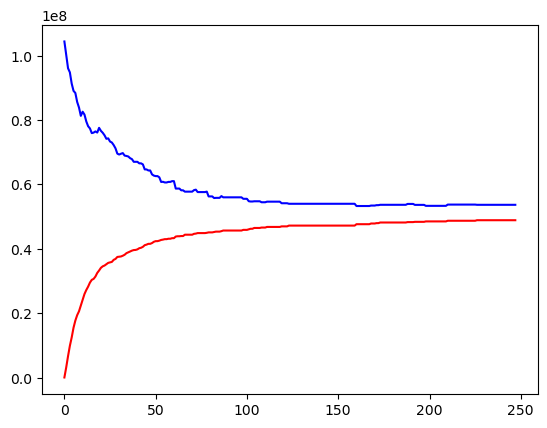

In [139]:
# min_samples_split

tr = []
ts = []
for i in range(2,250,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr,c='r')
plt.plot(ts,c='b')

In [147]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_split=170)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err

(47891160.87940159, 53456395.18067339)

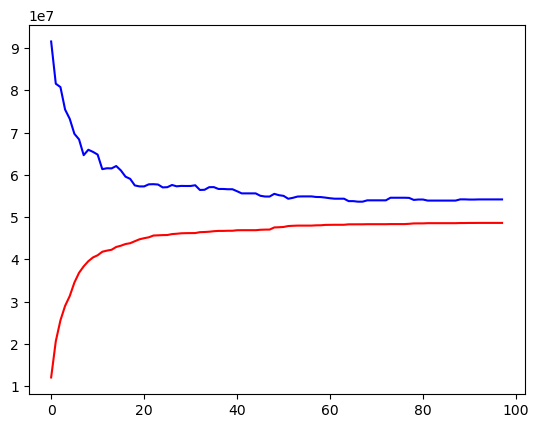

In [149]:
# min_samples_leaf

tr = []
ts = []
for i in range(2,100,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=i)
    model = dtr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr,c='r')
plt.plot(ts,c='b')

In [156]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=60)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err

(48075242.32748774, 54744875.50223727)

# ploting a tree


In [161]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=1)
model = dtr.fit(Xnew,Y)
model

DecisionTreeRegressor(max_depth=1, random_state=21)

In [162]:
from sklearn.tree import export_graphviz
export_graphviz(dtr,out_file='hr_pred.out')

In [159]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)
model = rfr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_err,ts_err



(8012235.535194381, 57983611.991219245)

# Cross validation